In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.datasets import cifar10 #(50000, 32X32)

In [52]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [53]:
n_classes = 10

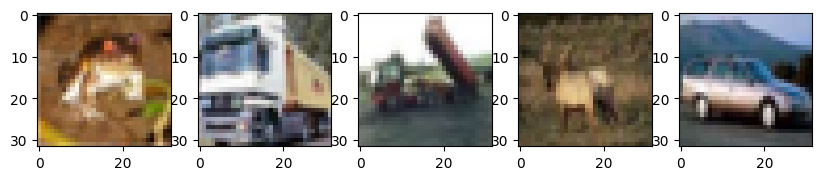

In [54]:
fig = plt.figure()
for i in range(5):
    a = fig.add_subplot(1, 5, i + 1)
    img_num = np.random.randint(x_train.shape[0])
    image = x_train[i]
    id = y_train[i]
    plt.imshow(image)
fig.set_size_inches(10,10)
plt.show()

In [55]:
# Encoding
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [56]:
# Construir o modelo
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(64, activation='relu'),
    Dense(n_classes, activation='softmax')
])

# Compilar o modelo
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Treinar o modelo
model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_test, y_test)
)

# Avaliar o modelo
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Acurácia no teste: {accuracy * 100:.2f}%')


Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.2419 - loss: 2.0940 - val_accuracy: 0.3445 - val_loss: 1.8394
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3488 - loss: 1.8313 - val_accuracy: 0.3678 - val_loss: 1.7859
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3703 - loss: 1.7844 - val_accuracy: 0.3719 - val_loss: 1.7625
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3832 - loss: 1.7533 - val_accuracy: 0.3885 - val_loss: 1.7307
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3886 - loss: 1.7306 - val_accuracy: 0.4003 - val_loss: 1.7017
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3974 - loss: 1.7062 - val_accuracy: 0.3939 - val_loss: 1.7009
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3995 - loss: 1.6940 - val_accuracy: 0.4042 - val_loss: 1.6732
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4061 - loss: 1.6792 - val_accuracy: 0.

In [70]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(n_classes, activation='softmax')
])


model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_test, y_test)
)

# Avaliar o modelo
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Acurácia no teste: {accuracy * 100:.2f}%')

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.2722 - loss: 1.9434 - val_accuracy: 0.5018 - val_loss: 1.3801
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.4778 - loss: 1.4526 - val_accuracy: 0.5600 - val_loss: 1.2230
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.5498 - loss: 1.2795 - val_accuracy: 0.6067 - val_loss: 1.1031
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.5918 - loss: 1.1601 - val_accuracy: 0.6311 - val_loss: 1.0510
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.6258 - loss: 1.0655 - val_accuracy: 0.6511 - val_loss: 0.9889
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.6514 - loss: 0.9926 - val_accuracy: 0.6697 - val_loss: 0.9277
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.6767 - loss: 0.9225 - val_accuracy: 0.6941 - val_loss: 0.8774
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.6995 - loss: 0.8638 - 

In [69]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),  # Agora é seguro
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(n_classes, activation='softmax')
])



model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=128,
    validation_data=(x_test, y_test)
)

# Avaliar o modelo
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Acurácia no teste: {accuracy * 100:.2f}%')

Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 36s 85ms/step - accuracy: 0.2733 - loss: 1.9499 - val_accuracy: 0.5022 - val_loss: 1.3981
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 77ms/step - accuracy: 0.5043 - loss: 1.3838 - val_accuracy: 0.6028 - val_loss: 1.1007
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 36s 92ms/step - accuracy: 0.6045 - loss: 1.1331 - val_accuracy: 0.6718 - val_loss: 0.9416
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 82ms/step - accuracy: 0.6620 - loss: 0.9789 - val_accuracy: 0.6987 - val_loss: 0.8551
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - accuracy: 0.7112 - loss: 0.8391 - val_accuracy: 0.7151 - val_loss: 0.8181
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - accuracy: 0.7387 - loss: 0.7563 - val_accuracy: 0.7319 - val_loss: 0.7752
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 87ms/step - accuracy: 0.7754 - loss: 0.6577 - val_accuracy: 0.7386 - val_loss: 0.7661
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 87ms/step - accuracy: 0.7959 - loss: 0.5889 - 

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),  # Agora é seguro
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(n_classes, activation='softmax')
])


model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_test, y_test)
)

# Avaliar o modelo
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Acurácia no teste: {accuracy * 100:.2f}%')


Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 83ms/step - accuracy: 0.2860 - loss: 1.9260 - val_accuracy: 0.5402 - val_loss: 1.3162
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 36s 91ms/step - accuracy: 0.5173 - loss: 1.3475 - val_accuracy: 0.6049 - val_loss: 1.1102
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 96ms/step - accuracy: 0.6036 - loss: 1.1313 - val_accuracy: 0.6547 - val_loss: 0.9871
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - accuracy: 0.6702 - loss: 0.9619 - val_accuracy: 0.6928 - val_loss: 0.8654
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 87ms/step - accuracy: 0.7188 - loss: 0.8246 - val_accuracy: 0.7054 - val_loss: 0.8437
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 91ms/step - accuracy: 0.7464 - loss: 0.7460 - val_accuracy: 0.7461 - val_loss: 0.7375
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 90ms/step - accuracy: 0.7788 - loss: 0.6478 - val_accuracy: 0.7512 - val_loss: 0.7262
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 77ms/step - accuracy: 0.8074 - loss: 0.5651 - 

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, labels):
    return np.mean(predictions == labels)

def init_params(input_neurons, hidden_neurons, output_neurons, bias_scale):
    W1 = np.random.rand(hidden_neurons, input_neurons) * 0.01
    b1 = np.random.rand(hidden_neurons, 1) * bias_scale
    W2 = np.random.rand(output_neurons, hidden_neurons) * 0.01
    b2 = np.random.rand(output_neurons, 1) * bias_scale
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    Z_shifted = Z - np.max(Z, axis=0, keepdims=True)
    exp_values = np.exp(Z_shifted)
    return exp_values / np.sum(exp_values, axis=0, keepdims=True)

def forward_prop(W1, b1, W2, b2, X):
    Z1 = np.dot(W1, X) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot_encode(Y):
    one_hot_Y = np.zeros((Y.size, 10))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def compute_cost(A2, Y):
    m = Y.shape[1]
    cost = -1/m * np.sum(Y * np.log(A2 + 1e-8))
    return cost

def backwards_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.shape[1]
    dZ2 = A2 - Y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = np.dot(W2.T, dZ2) * ReLU_deriv(Z1)
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [ ]:
x_train = x_train.reshape(x_train.shape[0], -1).T 
x_test = x_test.reshape(x_test.shape[0], -1).T

y_train_cat = to_categorical(y_train, 10).T 
y_test_cat = to_categorical(y_test, 10).T

input_size = 3072  
hidden_size = 64
output_size = 10    
bias_scale = 0.01

W1, b1, W2, b2 = init_params(input_size, hidden_size, output_size, bias_scale)

# 3. Loop de treino
learning_rate = 0.1
num_epochs = 1000
batch_size = 1000

for epoch in range(num_epochs):
    X = x_train[:, :batch_size]
    Y = y_train_cat[:, :batch_size]
    
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    cost = compute_cost(A2, Y)
    dW1, db1, dW2, db2 = backwards_prop(Z1, A1, Z2, A2, W1, W2, X, Y)

    # Atualização dos parâmetros
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

    if epoch % 100 == 0:
        print(f"Época {epoch}, Custo: {cost:.4f}")

Época 0, Custo: 2.3134
Época 100, Custo: 2.3005
Época 200, Custo: 2.3001
Época 300, Custo: 2.3000
Época 400, Custo: 2.3000
Época 500, Custo: 2.3000
Época 600, Custo: 2.3000
Época 700, Custo: 2.3000
Época 800, Custo: 2.3000
Época 900, Custo: 2.3000


In [ ]:
num_batches = x_train.shape[1] // batch_size

for epoch in range(num_epochs):
    permutation = np.random.permutation(x_train.shape[1]) 
    x_train_shuffled = x_train[:, permutation]
    y_train_cat_shuffled = y_train_cat[:, permutation]

    for i in range(num_batches):
        start = i * batch_size
        end = start + batch_size
        X = x_train_shuffled[:, start:end]
        Y = y_train_cat_shuffled[:, start:end]

        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        cost = compute_cost(A2, Y)
        dW1, db1, dW2, db2 = backwards_prop(Z1, A1, Z2, A2, W1, W2, X, Y)

        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

    if epoch % 100 == 0:
        print(f"Época {epoch}, Custo: {cost:.4f}")


Época 0, Custo: 2.3036
Época 100, Custo: 1.8571
Época 200, Custo: 1.8740
Época 300, Custo: 1.7859
Época 400, Custo: 1.7802
Época 500, Custo: 1.7727
Época 600, Custo: 1.8443
Época 700, Custo: 1.7143
Época 800, Custo: 1.7909
Época 900, Custo: 1.7254


In [ ]:
predictions = get_predictions(A2) 

labels = np.argmax(Y, axis=0)

accuracy = get_accuracy(predictions, labels)
print(f"Acurácia: {accuracy * 100:.2f}%")

Acurácia: 37.40%
